Import necessary Libraries and load data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()      

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Let's check the shape of our dataset

In [3]:
df.shape

(158, 12)

There are 158 Rows and 12 Columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There is no Null values and country and region column are of object data type

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are 0 null values in this dataset

Let's check the distribution of our data but first remove the data which is of Object data type

In [118]:
df2=df.drop(columns=['Country','Region'])

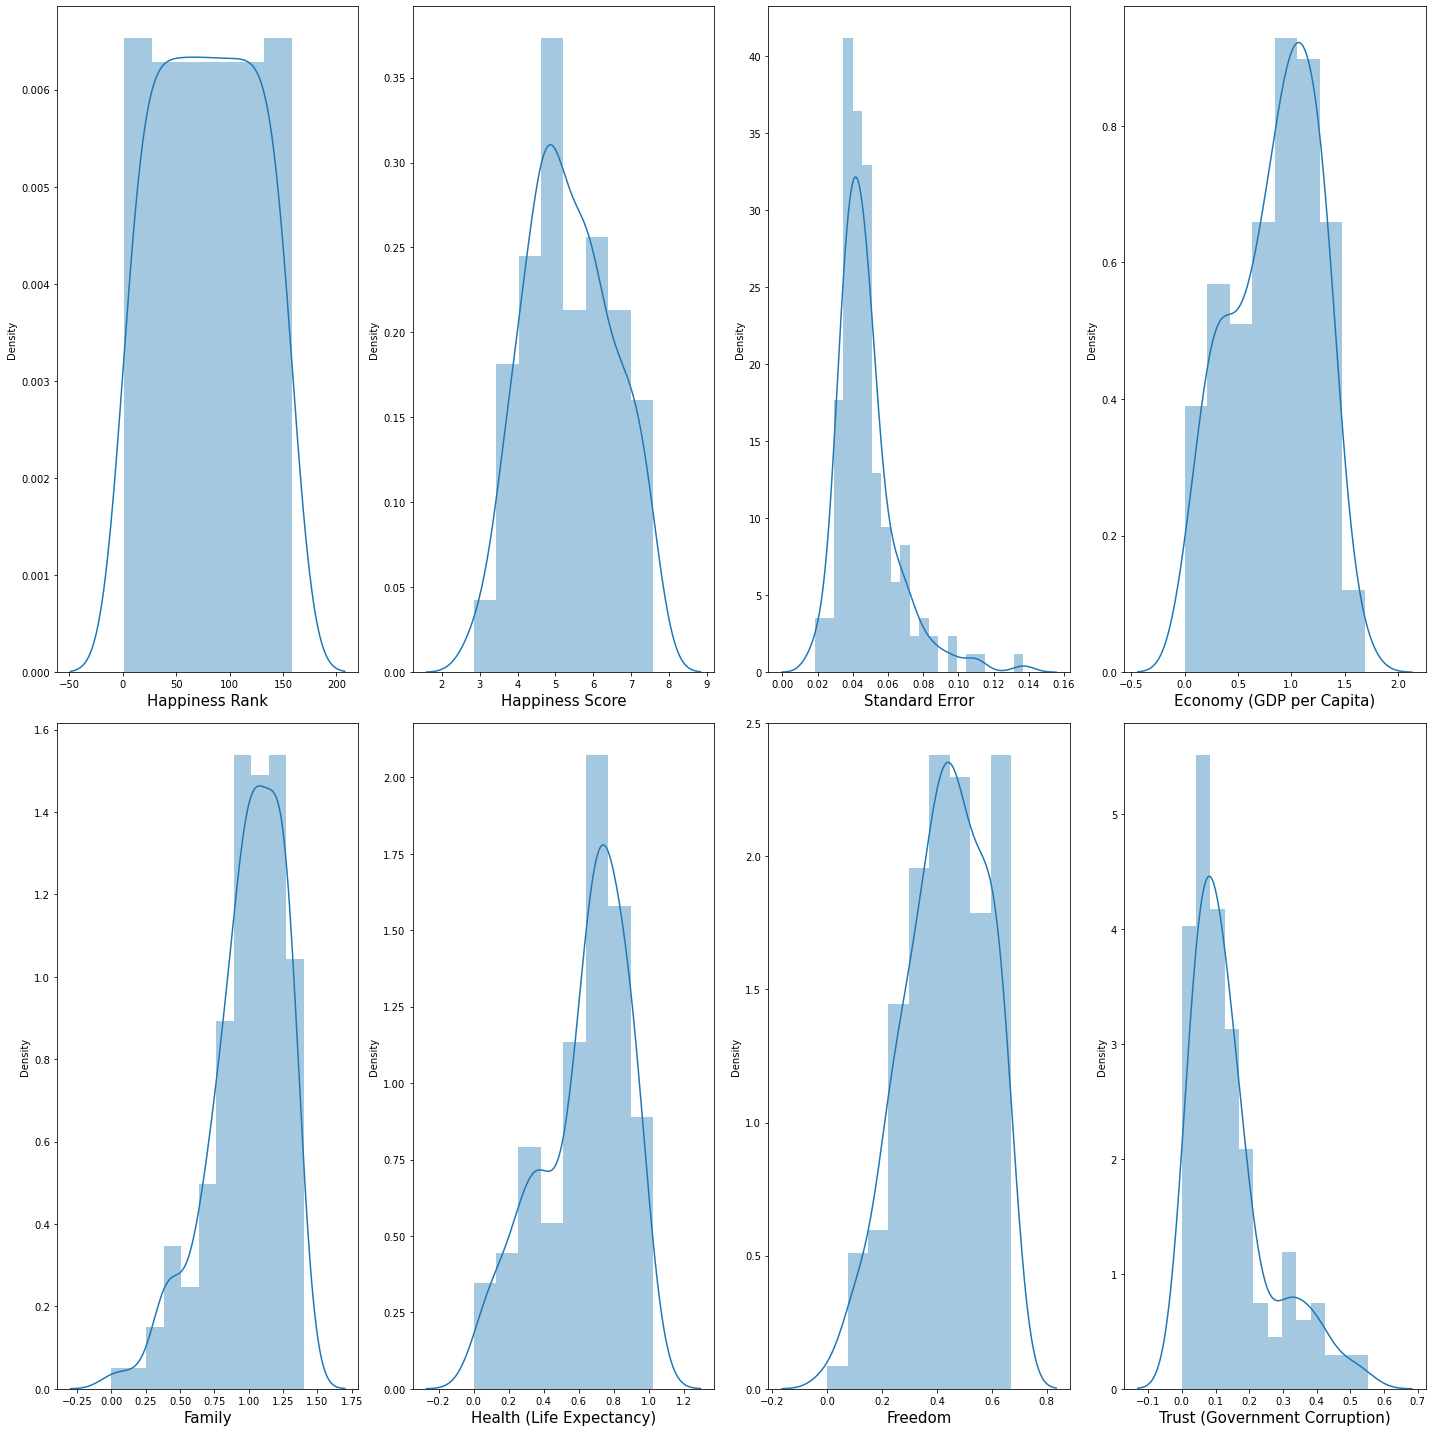

In [119]:
plt.figure(figsize =(20,20), facecolor = 'white')
plotnumber=1

for column in df2:
    if plotnumber<=8:
         ax=plt.subplot(2,4,plotnumber)
         sns.distplot(df2[column])
         plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Let's observe  the relationship between the independent variables and dependent variables


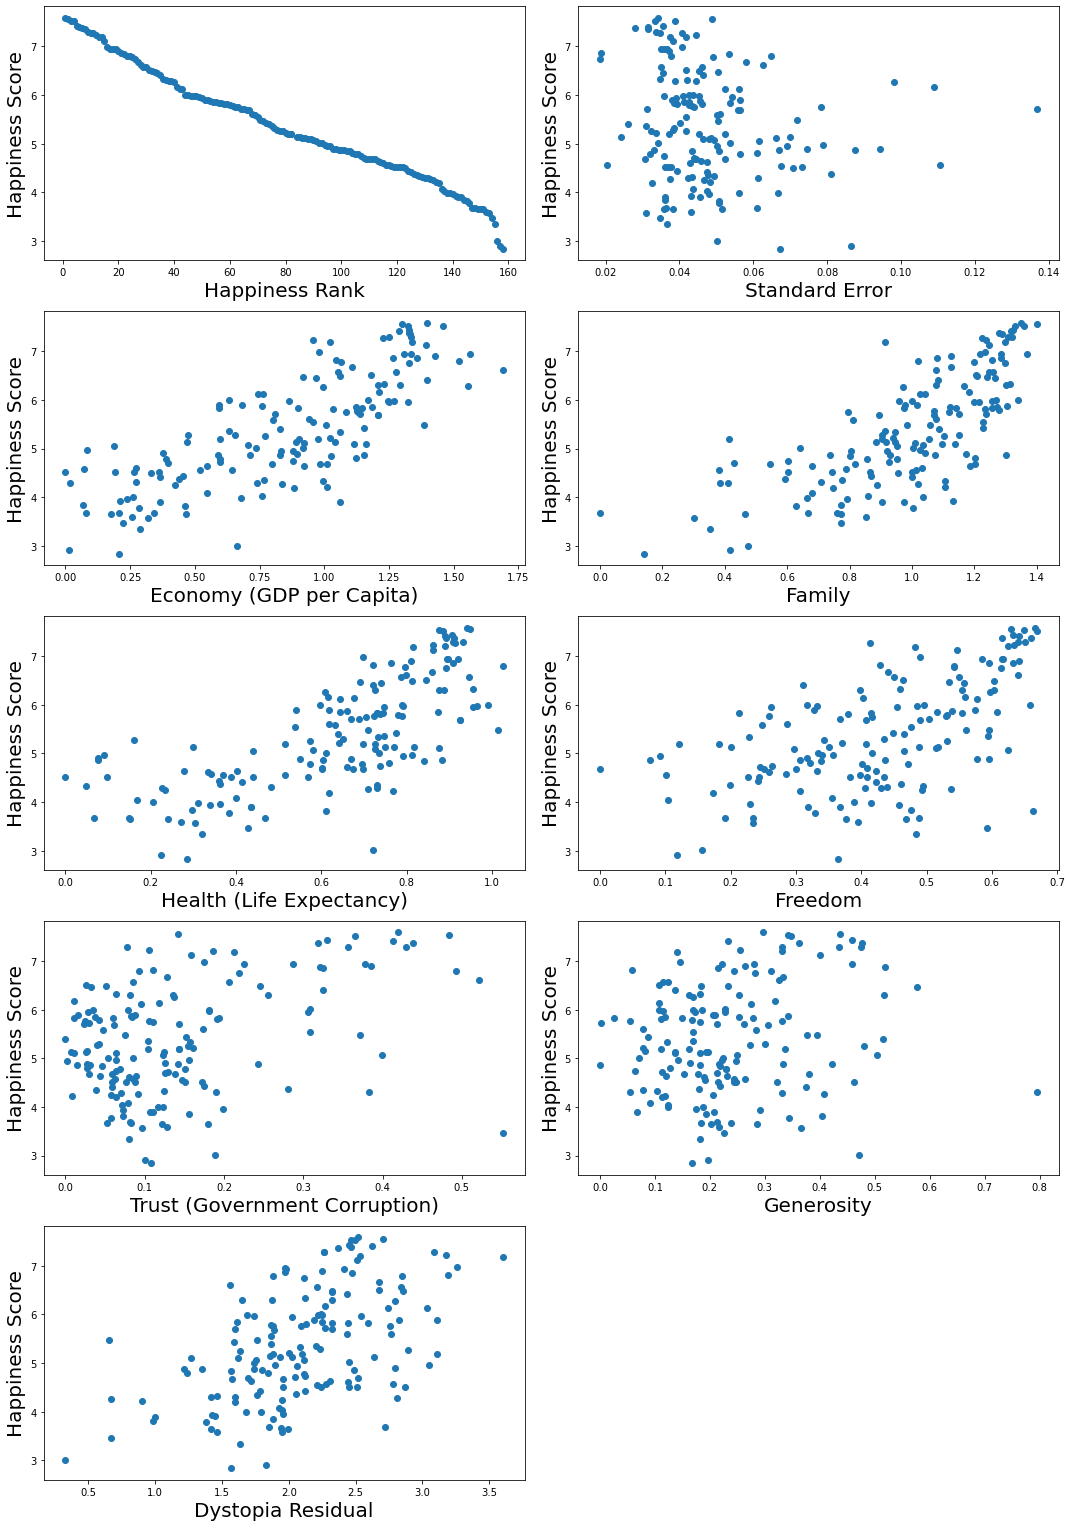

In [121]:
#Visualizing Relationship
plt.figure(figsize=(15,25), facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=11:
        ax=plt.subplot(6,2,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here we can see that Standard error, Trust(Government corruption) and generosity are not much correlated, hence we prefer to drop these columns

In [122]:
#Divide dataset into features and variables
Y=df2['Happiness Score']
X=df2.drop(columns=['Happiness Score'])

In [123]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [124]:
X

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [125]:
df3=df2.drop(columns=['Happiness Score','Standard Error','Trust (Government Corruption)','Generosity'])
y = df['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [126]:
#data Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df3)

In [127]:
#Let's check how scaled data looks like
X_scaled

array([[-1.72099989e+00,  1.36962124e+00,  1.32028142e+00,
         1.26340809e+00,  1.57743784e+00,  7.58258088e-01],
       [-1.69907456e+00,  1.13522625e+00,  1.51445776e+00,
         1.28943383e+00,  1.33245589e+00,  1.09285682e+00],
       [-1.67714922e+00,  1.19286069e+00,  1.36105403e+00,
         9.92228817e-01,  1.46965910e+00,  7.12335259e-01],
       [-1.65522389e+00,  1.52512972e+00,  1.25192192e+00,
         1.03514490e+00,  1.60513145e+00,  6.63893379e-01],
       [-1.63329856e+00,  1.19487640e+00,  1.22120434e+00,
         1.11805373e+00,  1.36041579e+00,  6.39337171e-01],
       [-1.61137323e+00,  1.10518965e+00,  1.20518259e+00,
         1.05097959e+00,  1.41846586e+00,  9.43417340e-01],
       [-1.58944789e+00,  1.20271529e+00,  1.06489092e+00,
         1.06612405e+00,  1.24584679e+00,  6.64600163e-01],
       [-1.56752256e+00,  1.20836426e+00,  1.09767107e+00,
         1.13932906e+00,  1.53902627e+00,  4.93322871e-01],
       [-1.54559723e+00,  1.00547410e+00,  1.210

Let's go ahead and use Linear Regression and see how good it fits our data, But first we need to split our data


In [128]:
#Split data into train and tests. Model will be built on training data and testedon test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state=1)
y_train.head()

56     5.828
136    4.033
132    4.252
12     7.200
54     5.848
Name: Happiness Score, dtype: float64

# Model Instantiating and training

In [129]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# Prediction part

In [130]:
df3.tail(2)

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
156,157,0.01530,0.41587,0.22396,0.11850,1.83302
157,158,0.20868,0.13995,0.28443,0.36453,1.56726


In [131]:
print('Happiness score is : ',regression.predict(scaler.transform([[157,0.01530,0.41587,0.22396,0.11850,1.83302]])))

Happiness score is :  [3.17798406]


In [132]:
df.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [133]:
df.iloc[156] 

Country                                     Burundi
Region                           Sub-Saharan Africa
Happiness Rank                                  157
Happiness Score                               2.905
Standard Error                              0.08658
Economy (GDP per Capita)                     0.0153
Family                                      0.41587
Health (Life Expectancy)                    0.22396
Freedom                                      0.1185
Trust (Government Corruption)               0.10062
Generosity                                  0.19727
Dystopia Residual                           1.83302
Name: 156, dtype: object

Let's check how well model fits the train data

In [134]:
regression.score(x_train, y_train)

0.9894440713817864

We got 98.94%

Let's check how well model fits the test data

In [139]:
regression.score(x_test, y_test)

0.9884589969834654

We got 98.84%

In [140]:
y_pred = regression.predict(x_test)

In [141]:
y_pred

array([6.67752783, 4.67146576, 7.01609   , 5.31358694, 4.29810834,
       6.85713043, 5.44203427, 7.19317644, 6.35899311, 4.88842756,
       4.92465008, 5.03574591, 4.65363703, 5.00766288, 5.88239801,
       5.13968561, 6.28390985, 6.0658484 , 6.02497033, 3.7138309 ,
       5.94228437, 6.47037324, 3.8323988 , 7.25925074, 4.26358046,
       6.55769575, 6.90602653, 5.29124811, 4.29001113, 5.12211263,
       4.38603481, 3.17798406, 4.07281953, 6.18611405, 4.36873001,
       5.24134657, 5.39699464, 4.83478148, 6.45636192, 3.46472205])

Let's plot relationship between actual and predicted

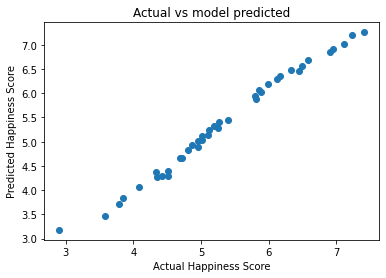

In [142]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs model predicted')
plt.show()

# # Model Evaluation

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = regression.predict(x_test)
mean_absolute_error(y_test, y_pred)

0.09443323941758247

In [144]:
mean_squared_error(y_test, y_pred)

0.013062191744747775

In [145]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.11428994594778569

# #Lasso regression

In [146]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv = LassoCV(alphas = None, max_iter =100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

# best alpha parameter (learning rate)

In [147]:
alpha = lasscv.alpha_
alpha

0.00010655584493796165

Now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

In [148]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00010655584493796165)

In [149]:
lasso_reg.score(x_test, y_test)

0.9884273517724319

98.84%

# Prediction part

In [150]:
print('Happiness score is : ',lasso_reg.predict(scaler.transform([[157,0.01530,0.41587,0.22396,0.11850,1.83302]])))

Happiness score is :  [3.18038983]


# #Ridge Regression

RidgeCV will return best alpha and coefficients after performing 10 cross validations

In [151]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.001), normalize = True)

In [152]:
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

# Best alpha parameter

In [153]:
ridgecv.alpha_

0.002

In [154]:
ridge_model  = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.002)

In [155]:
ridge_model.score(x_train, y_train)

0.9894440694025031

We got 98.94%

In [156]:
ridge_model.score(x_test, y_test)

0.9884617441881374

We got 98.84%

# Prediction part

In [157]:
print('Happiness score is : ',ridge_model.predict(scaler.transform([[157,0.01530,0.41587,0.22396,0.11850,1.83302]])))

Happiness score is :  [3.17781898]


Let us check the cross validation score for each model

In [167]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(ridge_model, x_test, y_test, cv = 5)

In [169]:
cv_mean = cv_score.mean()
cv_mean

0.9999238933453233

In [ ]:
cv_score = cross_val_score(lasso_reg, x_test, y_test, cv = 5)

In [170]:
cv_mean = cv_score.mean()
cv_mean

0.9999238933453233

In [171]:
cv_score = cross_val_score(regression, x_test, y_test, cv = 5)

In [172]:
cv_mean = cv_score.mean()
cv_mean

0.9999259358775922

Infgerence: - All the tested model are giving the same kind of performance.

In [177]:
import pickle
filename = "Happiness"
pickle.dump(ridge_model, open(filename,'wb'))